In [3]:
!pip install insightface opencv-python numpy


  Using cached insightface-0.7.3.tar.gz (439 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-2.2.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached onnx-1.17.0-cp311-cp311-win_amd64.whl.metadata (16 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl.metadata (9.1 kB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached scikit_image-0.25.2-cp311-cp


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!python.exe -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 20.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1


In [2]:
import insightface
from insightface.app import FaceAnalysis
from sklearn.metrics.pairwise import cosine_similarity
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
# Load ArcFace model
app = FaceAnalysis(name='buffalo_l')  # 'buffalo_l' is a strong ArcFace variant
app.prepare(ctx_id=0, det_size=(640, 640))  # Use ctx_id=0 for GPU, -1 for CPU


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [30]:
def get_face_embedding(image_path):
    img = cv2.imread(image_path)
    faces = app.get(img)

    if not faces:
        print(f"No face found in {image_path}")
        return None

    # Use the first detected face
    return faces[0].embedding


In [31]:
suspect_path = 'suspect_images/johnny_depp.jpg'
suspect_embedding = get_face_embedding(suspect_path)


AttributeError: 'NoneType' object has no attribute 'shape'

In [22]:
extracted_images_folder = './celebrity_faces_dataset'
threshold = 0.4  # Lower is stricter; 0.4 is commonly used for ArcFace

matches = []

for img_name in os.listdir(extracted_images_folder):
    img_path = os.path.join(extracted_images_folder, img_name)
    target_embedding = get_face_embedding(img_path)

    if target_embedding is not None:
        # ArcFace embeddings are L2-normalized, so Euclidean distance is fine
        dist = np.linalg.norm(suspect_embedding - target_embedding)
        if dist < threshold:
            print(f"[MATCH FOUND] {img_name} (Distance: {dist:.3f})")
            matches.append((img_name, dist))
        else:
            print(f"[NO MATCH] {img_name} (Distance: {dist:.3f})")


[NO MATCH] 001_08194468.jpg (Distance: 27.280)
[NO MATCH] 001_08212dcd.jpg (Distance: 28.082)
[NO MATCH] 001_21a7d5e6.jpg (Distance: 31.072)
[NO MATCH] 001_504d320d.jpg (Distance: 29.642)
[NO MATCH] 001_5992faf7.jpg (Distance: 28.056)
[NO MATCH] 001_5ef3e95c.jpg (Distance: 29.577)
[NO MATCH] 001_986d6c22.jpg (Distance: 28.764)
[NO MATCH] 001_9adc92c2.jpg (Distance: 27.870)
[NO MATCH] 001_9cd1160a.jpg (Distance: 29.680)
[NO MATCH] 001_a51bb26a.jpg (Distance: 27.967)
No face found in ./celebrity_faces_dataset\001_beebcee2.jpg
[NO MATCH] 001_c04300ef.jpg (Distance: 27.482)
[NO MATCH] 001_cb004eea.jpg (Distance: 28.951)
[NO MATCH] 001_dfb62d96.jpg (Distance: 30.831)
[NO MATCH] 001_fe3347c0.jpg (Distance: 29.091)
[NO MATCH] 002_078f6fe5.jpg (Distance: 30.610)
[NO MATCH] 002_24fab375.jpg (Distance: 30.567)
[NO MATCH] 002_36285f46.jpg (Distance: 31.621)
[NO MATCH] 002_3a2ef5df.jpg (Distance: 29.782)
[NO MATCH] 002_533748b2.jpg (Distance: 30.246)
[NO MATCH] 002_590bb980.jpg (Distance: 26.691)


In [23]:
print("\n--- Matching Images ---")
for match in matches:
    print(f"Image: {match[0]}, Distance: {match[1]:.3f}")



--- Matching Images ---
Image: johnny_depp_0.jpg, Distance: 0.000


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\scott/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

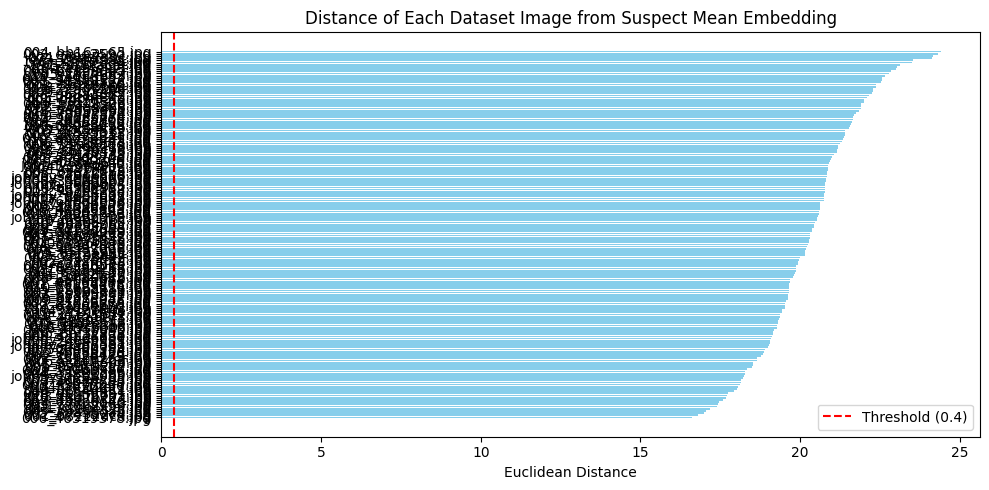


=== Matches Found ===


In [5]:

# === 1️⃣ Initialize ArcFace Model ===
app = FaceAnalysis(name='buffalo_l')  # ArcFace model
app.prepare(ctx_id=0, det_size=(640, 640))  # GPU: 0; CPU: -1

# === 2️⃣ Function to Get Aligned Embedding ===
def get_aligned_embedding(img_path):
    img = cv2.imread(img_path)
    faces = app.get(img)

    if not faces:
        print(f"[!] No face found in {img_path}")
        return None

    embedding = faces[0].embedding
    return embedding

# === 3️⃣ Compute Mean Embedding from Suspect Folder ===
def get_mean_embedding_from_folder(suspect_folder):
    embeddings = []
    for img_name in os.listdir(suspect_folder):
        img_path = os.path.join(suspect_folder, img_name)
        emb = get_aligned_embedding(img_path)
        if emb is not None:
            embeddings.append(emb)
        else:
            print(f"[!] Skipped {img_path} (no face detected)")
    if len(embeddings) == 0:
        raise ValueError("No valid embeddings found in the suspect folder.")
    mean_embedding = np.mean(embeddings, axis=0)
    mean_embedding = mean_embedding / np.linalg.norm(mean_embedding)  # Normalize
    print(f"✅ Mean embedding computed from {len(embeddings)} images.")
    return mean_embedding

# === 4️⃣ Matching Function ===
def match_and_plot(suspect_embedding, dataset_folder, threshold=0.4):
    matches = []
    distances = []

    for img_name in os.listdir(dataset_folder):
        img_path = os.path.join(dataset_folder, img_name)
        target_embedding = get_aligned_embedding(img_path)

        if target_embedding is not None:
            dist = np.linalg.norm(suspect_embedding - target_embedding)
            distances.append((img_name, dist))

            if dist < threshold:
                print(f"[MATCH] {img_name} (Distance: {dist:.3f})")
                matches.append((img_name, dist))
            else:
                print(f"[NO MATCH] {img_name} (Distance: {dist:.3f})")

    # Plot distances
    distances_sorted = sorted(distances, key=lambda x: x[1])
    labels, dists = zip(*distances_sorted)
    plt.figure(figsize=(10, 5))
    plt.barh(labels, dists, color='skyblue')
    plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold ({threshold})')
    plt.xlabel('Euclidean Distance')
    plt.title('Distance of Each Dataset Image from Suspect Mean Embedding')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Return matches
    return matches

# === 5️⃣ Paths ===
suspect_folder = './suspect_images'  # e.g., './suspect_images'
dataset_folder = './celebrity_faces_dataset'  # e.g., './dataset_images'

# === 6️⃣ Run Matching ===
suspect_embedding = get_mean_embedding_from_folder(suspect_folder)
matches = match_and_plot(suspect_embedding, dataset_folder, threshold=0.4)

# === 7️⃣ Output Matched Results ===
print("\n=== Matches Found ===")
for match in matches:
    print(f"Image: {match[0]}, Distance: {match[1]:.3f}")
